# Week 4 Data Preprocessing, Splitting Data, and creating Pipelines

Run the code cell below without changes


In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

# Read in the data set
The data set from Week 03 will be read in use the data set from the I provided in the assignment.

```
df = pd.read_csv('boston_eda.csv')
n = 5
df.head(n)  # display first 5 records
```

# Question 1
1. Use the code above and replace df with boston.

In [2]:
#Question 1 - Read in data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,-2.31,OTHER,0.538,NaN,65.2,4.0900,1.0,NaN,15.3,NaN,4.98,24.0
1,0.02731,0.0,7.07,RIVER,NaN,NaN,78.9,4.9671,2.0,242,17.8,NaN,NaN,21.6
2,NaN,0.0,7.07,OTHER,0.469,7.185,61.1,4.9671,2.0,NaN,NaN,NaN,NaN,34.7
3,0.03237,0.0,2.18,OTHER,NaN,6.998,45.8,6.0622,3.0,222',NaN,394.63,NaN,33.4
4,0.06905,0.0,2.18,RIVER,NaN,7.147,NaN,6.0622,NaN,222',NaN,NaN,NaN,36.2


# View the data structure

# Question 2 
1. Use the info() method to view the data structure of the boston dataframe.


In [3]:
# Question 2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     456 non-null    float64
 1   ZN       463 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      328 non-null    float64
 5   RM       329 non-null    float64
 6   AGE      317 non-null    float64
 7   DIS      339 non-null    float64
 8   RAD      314 non-null    float64
 9   TAX      336 non-null    object 
 10  PTRATIO  331 non-null    float64
 11  B        348 non-null    float64
 12  LSTAT    321 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), object(2)
memory usage: 55.5+ KB


# Data Structure
Given the modified Boston Housing Dataset examine the definitions of each column.<br>

The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable ('River' if tract bounds river; 'Other' otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per Ten Thousand dollars
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - percentage lower status of the population
- MEDV - Median value of owner-occupied homes in thousands of dollars


```
df['column'].unique()
```

# Question 3
1. Change the df to boston and find the unique values in the TAX column.

In [4]:
# Question 3


array([nan, '242', "222'", '311', '307', '279', '252', '233', '243',
       '469', '313', '256', '284', '337', '345', '305', '398', '281',
       '247', '270', '276', '384', '432', '188', '437', '403', '296',
       '193', '265', '329', '402', '348', '224', '277', '300', '330',
       '315', '264', '223', '254', '216', '198', '285', '241', '293',
       '245', '289', '358', '222', '304', '287', '422', '370', '352',
       '351', '280', '335', '411', '334', '666', '711', '391', '273'],
      dtype=object)

# Change the TAX column to float
Usually if a float is classified as object there is a typo in the column.  You need to replace the value in the column
then change the value to a float.

```
df['column'] = df['column'].str.replace("textstring", 'number')
df['column'] = df['column'].astype(float)
```

# Question 4
1. Use the code above and change df to boston.  Find the text string in the unique list and change it to look like the other values.
2. Change the column to a float.
3. Run the info() method to confirm you changed the TAX colum to float.

In [5]:
# Question 4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     456 non-null    float64
 1   ZN       463 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      328 non-null    float64
 5   RM       329 non-null    float64
 6   AGE      317 non-null    float64
 7   DIS      339 non-null    float64
 8   RAD      314 non-null    float64
 9   TAX      336 non-null    float64
 10  PTRATIO  331 non-null    float64
 11  B        348 non-null    float64
 12  LSTAT    321 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


# Missing Values
Use the code below to determine the number of missing values

```
df.isnull().sum()
```

# Question 5
1. Replace df with the dataframe boston and determine the number of missing values in the data set.


In [6]:
# Question 5


CRIM        50
ZN          43
INDUS        0
CHAS         0
NOX        178
RM         177
AGE        189
DIS        167
RAD        192
TAX        170
PTRATIO    175
B          158
LSTAT      185
MEDV         0
dtype: int64

# Houses near the River

```
df['column'].value_counts()
```

# Question 6
1. Determine the number of house near the River, using the code above replacing df with the correct data set name.
2. Determine the percentage in each category by using the code below and replacing the df with the appropriate data set and column for RIVER column name.

```
df['column name'].value_counts()*100/len(df)
```

In [7]:
# Find the unique values of CHAS


CHAS
OTHER    375
RIVER    131
Name: count, dtype: int64

In [8]:
# Find the percentage in each value


CHAS
OTHER    74.110672
RIVER    25.889328
Name: count, dtype: float64

# Splitting Data into Training and Test data sets
You want to make sure the same percentage of houses that are located by the river is in the train and test data sets.  Use the code below to create a stratified random sample based on the column that has the indicator of River or Other.
```
train_set, test_set = train_test_split(df, test_size= 0.2, stratify=df.['column'], random_state=42)
```

# Question 7
1. Split the data using the code above replacing df with the name of data set you are using.
2. **Use the random_state=42** when splitting the data set.
3. Check to make sure that 80% of the records are in the training set and 20% is in the test data set using info().
4. Check the percentage of CHAS column in each data set.


In [9]:
# Question 7 - 1 and 2


In [10]:
# Question 7 - 3) train set columns
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 461 to 394
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     364 non-null    float64
 1   ZN       368 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    object 
 4   NOX      260 non-null    float64
 5   RM       256 non-null    float64
 6   AGE      249 non-null    float64
 7   DIS      273 non-null    float64
 8   RAD      254 non-null    float64
 9   TAX      273 non-null    float64
 10  PTRATIO  259 non-null    float64
 11  B        281 non-null    float64
 12  LSTAT    257 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(13), object(1)
memory usage: 47.3+ KB


In [11]:
# Question 7 - 4) train set percentages


CHAS
OTHER    74.009901
RIVER    25.990099
Name: count, dtype: float64

In [12]:
# test set columns list


<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 117 to 384
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     92 non-null     float64
 1   ZN       95 non-null     float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    object 
 4   NOX      68 non-null     float64
 5   RM       73 non-null     float64
 6   AGE      68 non-null     float64
 7   DIS      66 non-null     float64
 8   RAD      60 non-null     float64
 9   TAX      63 non-null     float64
 10  PTRATIO  72 non-null     float64
 11  B        67 non-null     float64
 12  LSTAT    64 non-null     float64
 13  MEDV     102 non-null    float64
dtypes: float64(13), object(1)
memory usage: 12.0+ KB


In [13]:
# test set percentage


CHAS
OTHER    74.509804
RIVER    25.490196
Name: count, dtype: float64

# Reviewing the training data set
To see the count, mean, standard deviation, minimum, Q1 or 25%, Median or 50%, Q3 or 75% and maximum values run the code below.
```
df.describe().T  # transpose the layout of the describe output for numeric columns
df.describe(include=[object]).T  # transpose the output
```

# Question 8
1. Use the code above replacing df with training data set name and run describe() method for the numerical data.
2. Use the code above replacing df with training data set name and run describe() for categorical data.

In [14]:
# Question 8 - 1)


,count,mean,std,min,25%,50%,75%,max
CRIM,364.0,3.327854,8.470009,0.00632,0.08196,0.250895,2.815805,88.9762
ZN,368.0,11.669837,23.843189,0.00000,0.00000,0.000000,12.500000,100.0000
INDUS,404.0,10.910272,7.182130,-11.93000,4.95000,8.560000,18.100000,27.7400
NOX,260.0,0.553580,0.116286,0.39200,0.45300,0.524000,0.624000,0.8710
RM,256.0,6.298047,0.667526,3.56100,5.92675,6.209000,6.630000,8.7250
AGE,249.0,69.392369,28.116424,2.90000,45.70000,78.100000,94.300000,100.0000
DIS,273.0,3.740526,2.178968,-4.23900,2.06510,3.262800,5.231100,12.1265
RAD,254.0,9.377953,8.609150,1.00000,4.00000,5.000000,20.000000,24.0000
TAX,273.0,407.490842,166.754313,188.00000,284.00000,330.000000,666.000000,711.0000
PTRATIO,259.0,18.397683,2.183695,12.60000,16.70000,19.100000,20.200000,21.2000


# Column Adjustments for skewed distributions
There are a number of skewed distributions mean > median or median > mean.  We would transform the distributions to get a better fitting model.  Use sqrt of the column if the distribution is left skewed.  Use the log of the column is the distribution is right skewed.  Since this is a beginning machine learning class we will modify the pipeline next week to make the changes before running the various regression models.

In [15]:
# Question 8 - 2)


,count,unique,top,freq
CHAS,404,2,OTHER,299


# List of Numeric data columns
Use the code below to determine the numeric columns.

```
num_cols = df.select_dtypes(include=['number']).columns
num_cols
```
# Question 9
1. Use the code above replacing df with the training data set name and display the numeric features.

In [16]:
# Question 9


Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Create a scatter matrix of all numeric data to see what kind of relationship each variable has with the other.

```

scatter_matrix(df[numeric_column], figsize=(12,8))
plt.show()
```

# Question 10
1.  Use the code above replacing df with the appropriate data set name.
2. Create four lists(num_cols1, num_cols1A, numcols2, numcols2A) of numeric column name with the MEDV in each the list.
3. Run the scatter_matrix code against each list.

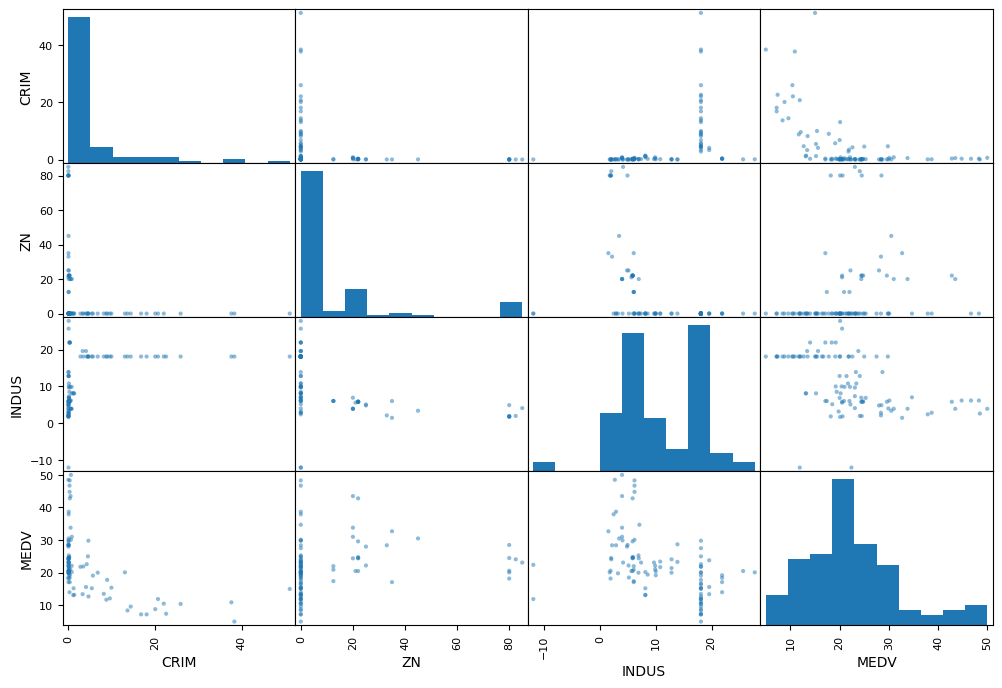

In [17]:
# Question 10
num_cols1 = ['CRIM', 'ZN', 'INDUS', 'MEDV']
num_cols1A= 
num_cols2 = 
num_cols2A = ['PTRATIO', 'B', 'LSTAT', 'MEDV']


In [ ]:
#Question 10 scatter plot for num_cols1


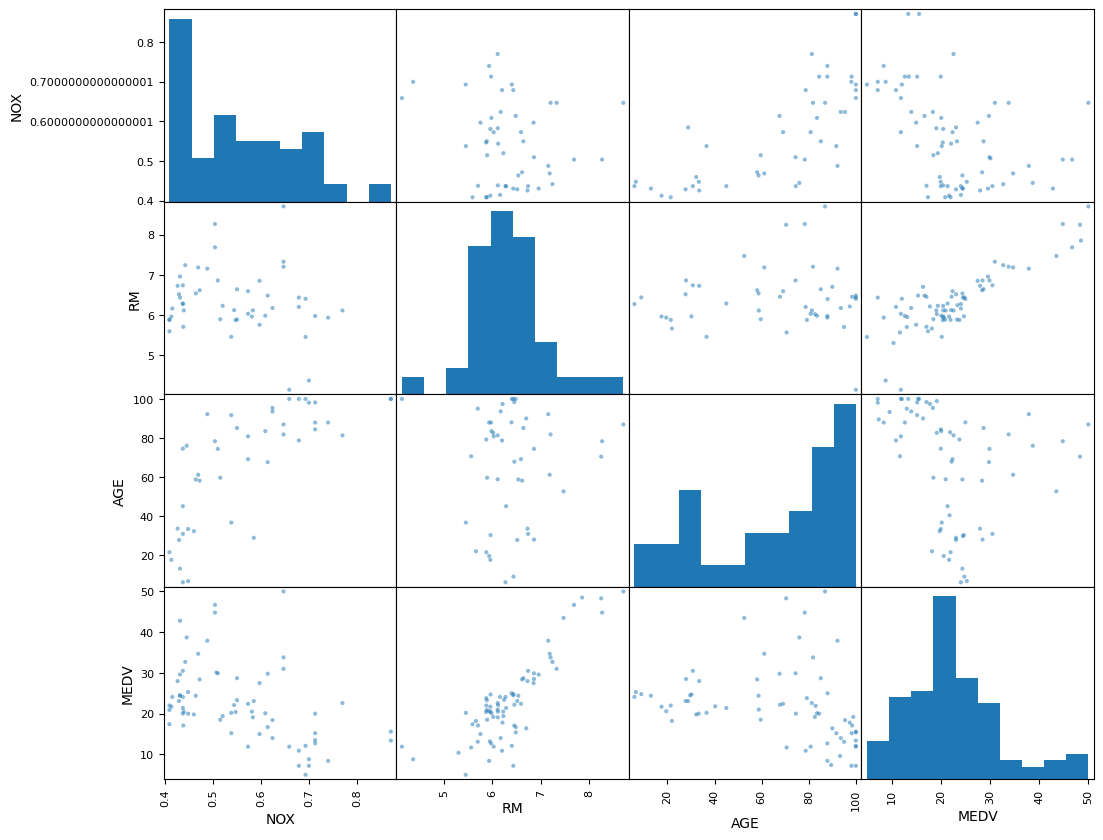

In [18]:
#Question 10 scatterplot for num_cols1A



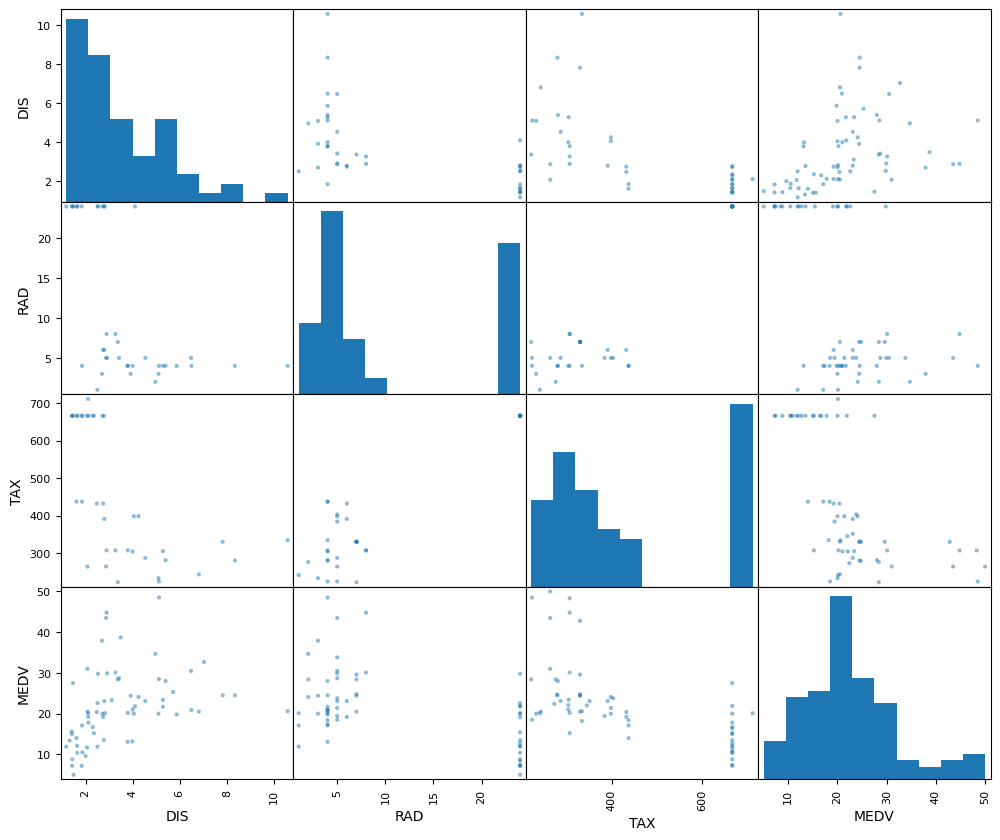

In [19]:
# Question 10 scatterplot for num_cols2


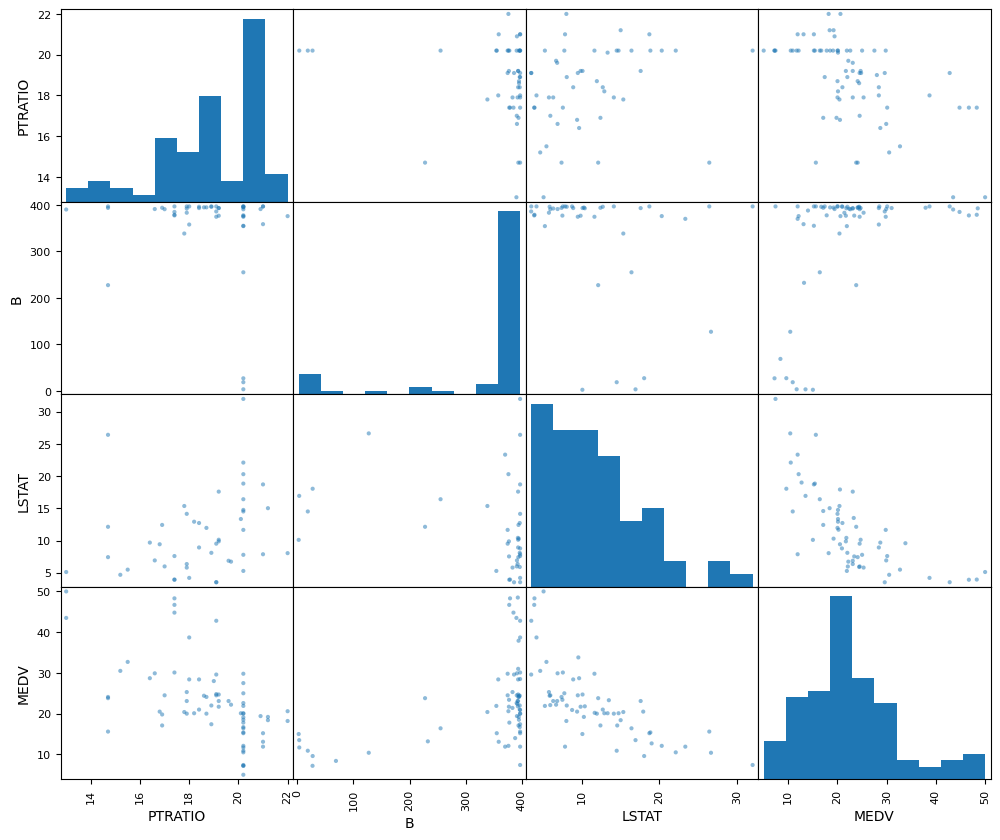

In [20]:
# Question 10 scatterplot for num_cols2A


# Create correlation matrix
To measure the linear relationship the numerical values has with the target variable MEDV we will use the correlation
matrix.

```
corr_matrix = df[num_cols].corr()
corr_matrix['target column name'].sort_values(ascending=False)
```

# Question 11
1. Use the code above replacing df with the appropriate data set and the target column with the target column name.

In [21]:
#Question 11


MEDV       1.000000
RM         0.689596
ZN         0.400475
B          0.294787
DIS        0.251437
CRIM      -0.336368
RAD       -0.374417
INDUS     -0.441785
NOX       -0.450889
TAX       -0.460538
AGE       -0.461786
PTRATIO   -0.507354
LSTAT     -0.725693
Name: MEDV, dtype: float64

# Data Visualization
Use the code below to create a bar chart of the median price of the property in near the River and other locations.

```
df_grouped = df.groupby("column name", as_index=False)["MEDV"].sum()

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x= 'column name', y='MEDV', data=df_grouped, palette="viridis")

# Customize the plot
plt.xlabel("column name")
plt.ylabel("Total Median House Price")
plt.title("Total Median House Price vs CHAS")
plt.xticks(rotation=45)

# show the plot
plt.show()
```

# Question 12
1. Use code replacing df with the appropriate data set name and create a bar chart with the CHAS and MEDV columns.


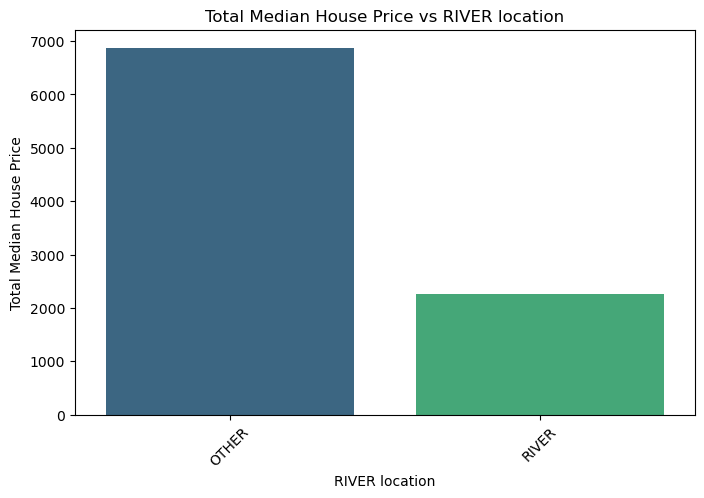

In [22]:
# Question 12


# Scatterplots of Target Variable and Top two correlated column.
To find the scatterplot of the top positive correlated feature with MEDV using the code below.

```
# Create scatter plot
ax = df.plot.scatter(x='length', y='width', c='DarkBlue')
plt.show()
```

# Question 13
1. Usint the code above, replacing it with the appropriate dataframe, create the scatterplot for the top positive correlated column.
2. Using the code above, replacing it with the appropriate dataframe, create the scatterplot for the top negative correlated column.


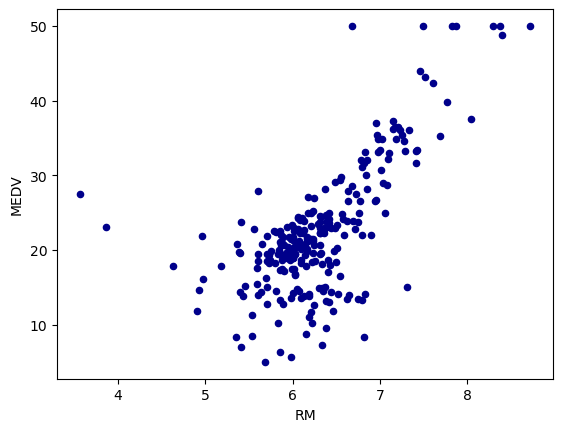

In [23]:
# Question 13 scatterplot of most positive


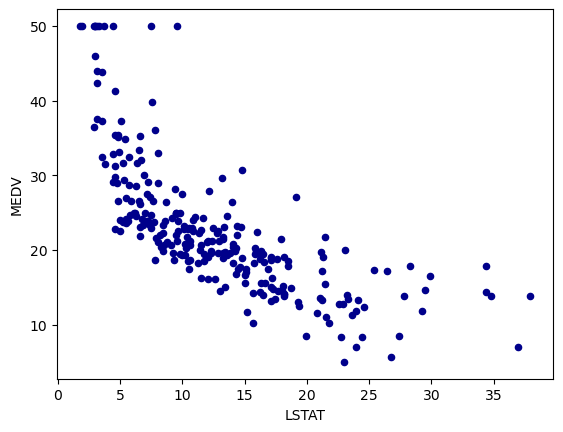

In [24]:
# Question 13 scatterplot for most negative correlation


# Define Features and Target variables for both training and test data sets

We have not yet separated the features and the target variables. The code below will separate the features and training set.

```
y_train = df['MEDV']
X_train = df.drop('MEDV', axis=1)

y_test = df1['MEDV']
X_test = df1.drop('MEDV', axis=1)
```

# Question 14
1. Create y_train, X_train, y_test, X_test using the code above replacing df and df1 with the appropriate data sets.


In [25]:
# Question 14


# Dealing with Missing Numerical Values
The SimpleImputer function is used to replace the missing values.  In the numeric columns we must decide how they will be replaced.  We will replace missing values with the median value. If I were not creating a pipeline for the data and modeling we would use the code below.

```
numeric_columns = X_train.select_dtypes(include=[np.number])

imputer = SimpleImputer(strategy="median")
imputer.fit(numeric_columns)
X = imputer.transform(numeric_columns)

X_tr_num = pd.DataFrame(X, columns=numeric_columns.columns, index=numeric_columns.index)
```
But since we will create a pipeline we will not use the code above.

# Standarizing the numerical values
To make sure no one column based on it large numbers doe not dominate the model, we standarize each variable by using the formula  (Value - column mean)/column_standard_deviation.  If we were not creating a pipeline for the data and modeling, we would use the code below.

```
numeric_columns = X_tr_num.select_dtypes(include=[np.number])

std_scaler = StandardScaler()
X_num_std = std_scaler.fit_transform(numeric_columns)
X_tr_num_std = pd.DataFrame(X_num_std, columns=numeric_columns.columns, index = numeric_columns.index)
```
But since we will create a pipeline we will not use the code above.


# Create the numerical pipeline
A pipeline is a series of steps that the data set goes through the prepare the data to create a model.  During this week, we will only created the pipeline for the data.  The pipeline is created using the following code.

```
# Creating a Pipeline for Numerical data
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
])
```
# Question 15
1. Use the code above to create the pipeline for numeric data.

In [26]:
# Question 15


# Dealing with Missing Categorical Values
If you had missing categorical values you would replace them with the most_frequent or mode of the column.  You would use the code below if you were not creating a pipeline.

```
category_columns = airBnb.select_dtypes(include=['object'])

imputer = SimpleImputer(strategy="most_frequent") imputer.fit(category_columns)
X_cat_mode = imputer.transform(category_columns)

X_tr_cat = pd.DataFrame(X_cat_mode, columns=category_columns.columns, index=numeric_columns.index)
```
But since we are creating a pipeline, we will not use the code above.

# Changing categorical columns to numbers using OneHotEncoder
The machine learning algorithms require all data input in the algorithms be numerical. Categorical data creates a column for each unique value of the column a new column with 0 and 1. For example Brooklyn would be a column with 0 if the record neighbourhood group is not Brooklyn and 1 if it is.


## Initialize OneHotEncoder

onehotencoder = OneHotEncoder(sparse_output=False, drop="first")  # drop="first" avoids dummy variable trap


## Fit and transform categorical columns
onehotencoder_data = onehotencoder.fit_transform(X_tr_cat)

## Convert to DataFrame with meaningful column names
X_tr_num_std = pd.DataFrame(onehotencoder_data, columns=onehotencoder.get_feature_names_out(X_cat.columns),
                            index=X_cat.index)
                            
## Combine both numeric and categorical dataframes
X_num_cat_tr = pd.concatenate([X_tr_num_std, X_tr_num_std], axis=1)

But since we are creating a pipeline we do not have to use the code.

# Creating pipeline for Categorical columns
We will create the Pipeline for the categorical data.

```
cat_pipeline = make_pipeline(
     SimpleImputer(strategy="most_frequent"),
     OneHotEncoder(handle_unknown="ignore"))

```
# Question 16
1. Use the code above to create the categorical pipeline.

In [27]:
# Question 16


# Create the data preprocessing pipeline
Use the code below to create the data preprocessing pipeline.

```
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
    )
```
# Question 17
1. Use the code above to create the preprocessing pipeline.

In [28]:
# Question 17


# Applying the preprocessing pipeline to data
To apply the pipeline created for data preprocessing to our X_train data features, we use the code below.

```
df_prepared = preprocessing.fit_transform(X_train)
df_prepared
```

# Question 18
1. Change df_prepared to X_train_prepared and run the preprocessing pipeline for the X_train data set.
2. Also, run preprocessing pipeline for the X_test data set.  Change X_train to X_test.


In [29]:
# Question 18 - 1)


array([[ 0.0828973 , -0.46283446,  1.00229915, ...,  0.43332868,
         0.        ,  1.        ],
       [ 0.18965933, -0.46283446,  1.00229915, ..., -0.89798264,
         0.        ,  1.        ],
       [-0.37020775,  3.67352289, -1.31604106, ..., -0.13243443,
         1.        ,  0.        ],
       ...,
       [-0.35289339, -0.46283446, -0.55766639, ..., -0.35166763,
         1.        ,  0.        ],
       [-0.36556114, -0.46283446, -1.21706201, ..., -0.13243443,
         0.        ,  1.        ],
       [ 1.27909954, -0.46283446,  1.00229915, ..., -0.13243443,
         1.        ,  0.        ]])

In [30]:
# Question 18 - 2)


array([[-0.43895722, -0.46949874, -0.10814091, ..., -0.16026288,
         1.        ,  0.        ],
       [-0.46784373,  1.14836853, -0.63613381, ...,  0.27173108,
         1.        ,  0.        ],
       [-0.46149732,  3.22848359, -1.19086053, ..., -0.19676941,
         1.        ,  0.        ],
       ...,
       [-0.3172055 , -0.46949874, -0.35810211, ..., -0.19676941,
         1.        ,  0.        ],
       [-0.43895722, -0.46949874,  0.97324201, ..., -0.19676941,
         1.        ,  0.        ],
       [ 1.7881568 , -0.46949874,  0.97324201, ..., -0.19676941,
         1.        ,  0.        ]])